![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

# Callysto’s Weekly Data Visualization

## Health Data

### Recommended Grade levels: 8-12
<br>

### Instructions
#### “Run” the cells to see the graphs
Click “Cell” and select “Run All”.<br> This will import the data and run all the code, so you can see this week's data visualization. Scroll to the top after you’ve run the cells.<br> 

![instructions](https://github.com/callysto/data-viz-of-the-week/blob/main/images/instructions.png?raw=true)

**You don’t need to do any coding to view the visualizations**.
The plots generated in this notebook are interactive. You can hover over and click on elements to see more information. 

Email contact@callysto.ca if you experience issues.

### About this Notebook

Callysto's Weekly Data Visualization is a learning resource that aims to develop data literacy skills. We provide Grades 5-12 teachers and students with a data visualization, like a graph, to interpret. This companion resource walks learners through how the data visualization is created and interpreted by a data scientist. 

The steps of the data analysis process are listed below and applied to each weekly topic.

1. Question - What are we trying to answer? 
2. Gather - Find the data source(s) you will need. 
3. Organize - Arrange the data, so that you can easily explore it. 
4. Explore - Examine the data to look for evidence to answer the question. This includes creating visualizations. 
5. Interpret - Describe what's happening in the data visualization. 
6. Communicate - Explain how the evidence answers the question. 

# Question

How do the health measurements in the supplied dataset compare to those in the classroom? This notebook is interactive in that a classroom element can be added by allowing students to collect their own measurements and compare.

### Goal
Our goal is to investigate an accessible type of data (body measurements) and compare it against at least one other set of the same measurements. 

- How are the datasets similar? 
- How are they different? 
- What could be a cause of the differences?
- Is there anything in the data that's surprising or sticks out?

The data that we're looking at in particular is taken from several thousand American children and adults. For each person, alongside height we have systolic and diastolic blood pressure measurements, as well as [resting heart rate](https://www.heartandstroke.ca/heart-disease/what-is-heart-disease/how-a-healthy-heart-works). All measurements were recorded three times (Why?).

### Blood Pressure

Blood pressure is an [important indicator of cardiovascular health](https://www.heartandstroke.ca/heart-disease/risk-and-prevention/condition-risk-factors/high-blood-pressure). Likely you've had your blood pressure measured at your arm anytime you would visit a doctor's office or other medical professional, and the measurement typically consists of two numbers: systolic blood pressure, and diastolic blood pressure. Blood pressure is usually recorded as:

$$
\frac{120}{80} mmHg
$$

where the units are **millimetres of mercury (mmHg)**.

The first number, systolic, is the pressure exerted by the heart on the arteries as it's contracting and forcing blood out of the left ventricle. This number can change quickly and frequently, often as a response to both negative stressors on the body (emotion, illness) or as a natural response to healthy states (exercise, sleep). The **typical healthy systolic blood pressure in adults is ~120 mmHg**, though it's not uncommon to have lower blood pressures in extremely active adults and children. Higher (resting) values of systolic blood pressure are generally a negative sign.

Diastolic blood pressure is the second value reported, and is less prone to sudden variation than systolic blood pressure. It represents the pressure in the arteries when the heart is *not* pumping. A **typical healthy diastolic blood pressure is ~80 mmHg**, though similar to systolic, it's not unusual to have lower values. As this measurement is more stable, seeing higher values of diastolic blood pressure is of more concern than higher values of systolic.

### Heart Rate

Probably one of the simplest to collect measurements of body function is heart rate. No doubt you've been aware of your heart rate at some point, either by measuring it directly, or by feeling it when it's been elevated. There are [multiple locations on the body that can be used to measure heart rate](https://www.healthline.com/health/how-to-check-heart-rate), but the easiest is the radial artery in the wrist:

![Radial HR measurement](https://s32917.pcdn.co/wp-content/uploads/2020/02/VHFC0134_How_do_I_measure_my_heart_rate_image1.jpeg)

By counting the number of beats that occur in a 15-second time period, and multiplying that number by 4, you can measure your heart rate in **beats per minute (bpm)**.

A typical (resting) heart rate in adults is between 60-72 bpm (up to 100 bpm in children), though extremely fit individuals can have a much lower heart rate. Heart rate can be elevated by the same stressors as blood pressure (exercise, emotional state) and can drop considerably during sleep.

Though blood pressure requires equipment to properly measure, both heart rate and height can be measured in the classroom. As you learn about visualizing this data, think about collecting your own and see how it compares.

# Gather

### Code:
The code below will import the Python programming libraries we need to gather and organize the data to answer our question.

In [12]:
## import libraries
import pandas as pd
import plotly.express as px

### Data:

We're going to collect the data from two different sources. The links below are to the files themselves, but to save time they've already been downloaded and are accessed in the next step

- [National Health and Nutrition Examination Survey (NHANES) Body Measurement](https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Examination&Cycle=2017-2020)
- [National Health and Nutrition Examination Survey (NHANES) Blood Pressure](https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_BPXO.XPT)

### Import the data

In [2]:
## import data
nhanesDataHt = pd.read_sas('data/P_BMX.XPT')[['SEQN','BMXHT']]
nhanesDataBp = pd.read_sas('data/P_BPXO.XPT')[['SEQN', 
                                               'BPXOSY1', 
                                               'BPXOSY2', 
                                               'BPXOSY3', 
                                               'BPXODI1', 
                                               'BPXODI2', 
                                               'BPXODI3', 
                                               'BPXOPLS1', 
                                               'BPXOPLS2', 
                                               'BPXOPLS3']]

### Comment on the data
We have two datasets from the NHANES, one containing data about height, and the other containing data about blood pressure and heart rate. The datasets contain far more data than we actually need, so in the same step that we import the data, we've also only selected the columns that we need and discarded the rest. However, the names of the columns aren't very descriptive.

# Organize

Now that we have the data in our program, we can make some changes to it to make our analysis easier. The first step we're going to do is to rename our columns, as the coding given to them by the researchers that originally collected the data isn't very helpful. Thankfully, along with the data, the researchers also published a 'data dictionary' that helps us convert the codes into something more helpful.

In [3]:
# Data cleaning
anthNames = {
    'SEQN': 'ID', 
    'BMXHT': 'Height (cm)'}
bpNames = { 
    'SEQN' : 'ID',
    'BPXOSY1' : 'Systolic BP (1st reading)',
    'BPXOSY2' : 'Systolic BP (2nd reading)',
    'BPXOSY3' : 'Systolic BP (3rd reading)',
    'BPXODI1' : 'Diastolic BP (1st reading)',
    'BPXODI2' : 'Diastolic BP (2nd reading)',
    'BPXODI3' : 'Diastolic BP (3rd reading)',
    'BPXOPLS1' : 'Heart rate (1st reading)',
    'BPXOPLS2' : 'Heart rate (2nd reading)',
    'BPXOPLS3' : 'Heart rate (3rd reading)'
}
nhanesDataHt.rename(anthNames, axis=1, inplace=True)
nhanesDataBp.rename(bpNames, axis=1, inplace=True)

In [11]:
display(nhanesDataHt)
display(nhanesDataBp)

,ID,Height (cm)
0,109263.0,NaN
1,109264.0,154.7
2,109265.0,89.3
3,109266.0,160.2
4,109269.0,NaN
...,...,...
14295,124818.0,168.7
14296,124819.0,93.7
14297,124820.0,123.3
14298,124821.0,176.4


,ID,Systolic BP (1st reading),Systolic BP (2nd reading),Systolic BP (3rd reading),Diastolic BP (1st reading),Diastolic BP (2nd reading),Diastolic BP (3rd reading),Heart rate (1st reading),Heart rate (2nd reading),Heart rate (3rd reading)
0,109264.0,109.0,109.0,106.0,67.0,68.0,66.0,94.0,95.0,91.0
1,109266.0,99.0,99.0,99.0,56.0,55.0,52.0,68.0,66.0,66.0
2,109270.0,123.0,124.0,127.0,73.0,77.0,70.0,95.0,98.0,93.0
3,109271.0,102.0,108.0,111.0,65.0,68.0,68.0,73.0,71.0,70.0
4,109273.0,116.0,110.0,115.0,68.0,66.0,68.0,71.0,70.0,70.0
...,...,...,...,...,...,...,...,...,...,...
11651,124815.0,141.0,138.0,141.0,87.0,86.0,87.0,56.0,56.0,58.0
11652,124817.0,111.0,112.0,113.0,69.0,67.0,66.0,70.0,70.0,72.0
11653,124818.0,106.0,108.0,95.0,67.0,65.0,70.0,120.0,119.0,118.0
11654,124821.0,121.0,122.0,129.0,66.0,67.0,67.0,60.0,61.0,61.0


### Comment on the data
Now it should be more clear what exactly the data represents. We can also see that for the first dataset of heights, we have 14,300 observations, whereas the second dataset of blood pressures and heart rates is a little less at 11,656.

# Explore

The code below will be used to help us look for evidence to answer our question. We'll start by plotting our data, which is always a good first step when you're analyzing data for the first time, as it can reveal patterns or anomalies.

Another important aspect of science is using your background knowledge to put your data in context. The health data we're looking at in this notebook is commonly collected by health agencies at all levels of government, and much has been written about their role in health. We can use that information to give more meaning to our data, by either comparing it to the population averages, or to specified cutoffs for healthy values.

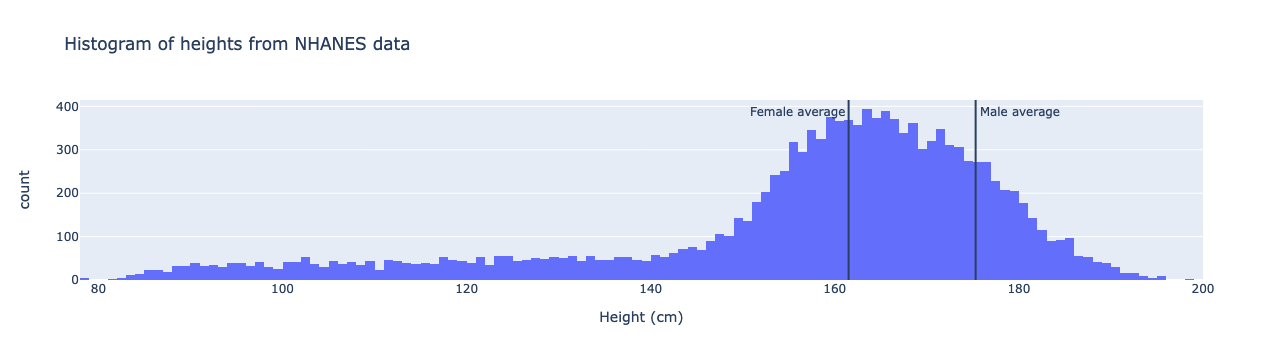

In [59]:
# Height data
fig = px.histogram(nhanesDataHt, 
                   x='Height (cm)',
                   title='Histogram of heights from NHANES data',
                   # marginal='box' # Can be turned on to explore box plots as well (should comment out vlines below if turned on)
                   )
fig.add_vline(175.3, annotation_text='Male average', annotation_position='right top')
fig.add_vline(161.5, annotation_text='Female average', annotation_position='left top')
fig.show()

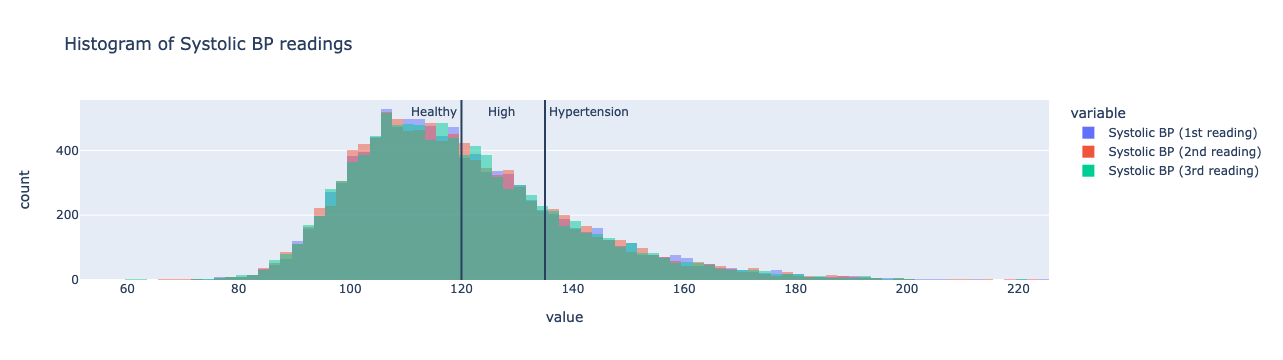

In [31]:
# Blood pressure data
fig = px.histogram(nhanesDataBp,
                   x=['Systolic BP (1st reading)', 'Systolic BP (2nd reading)', 'Systolic BP (3rd reading)'],
                   title='Histogram of Systolic BP readings',
                   barmode='overlay',
                   nbins=100,
                   # marginal='box' # Can be turned on to explore box plots as well (should comment out vlines below if turned on)
                   )
fig.add_vline(120, annotation_text='Healthy', annotation_position='top left')
fig.add_vline(135, annotation_text='High      ', annotation_position='top left')
fig.add_vline(135, annotation_text='Hypertension', annotation_position='top right')

fig.show()

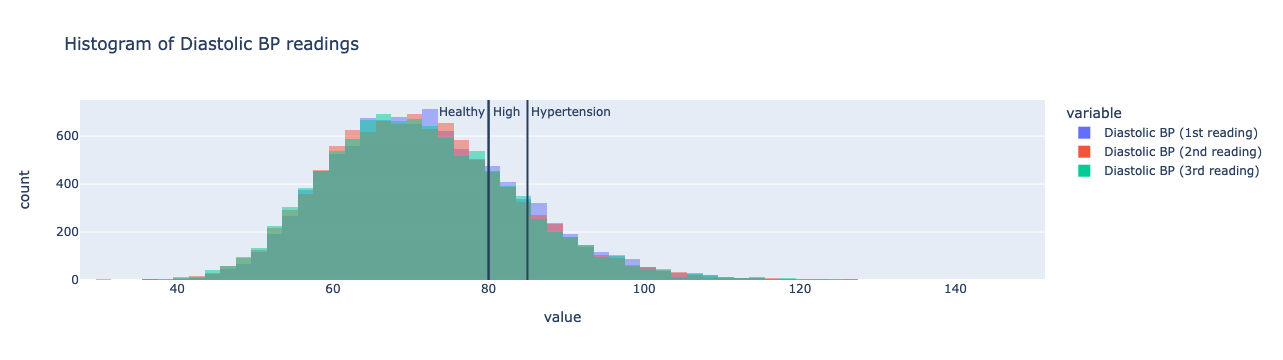

In [53]:
# Blood pressure data
fig = px.histogram(nhanesDataBp,
                   x=['Diastolic BP (1st reading)', 'Diastolic BP (2nd reading)', 'Diastolic BP (3rd reading)'],
                   title='Histogram of Diastolic BP readings',
                   barmode='overlay',
                   nbins=100,
                   # marginal='box' # Can be turned on to explore box plots as well (should comment out vlines below if turned on)
                   )
fig.add_vline(80, annotation_text='Healthy', annotation_position='top left')
fig.add_vline(80, annotation_text='High', annotation_position='top right')
fig.add_vline(85, annotation_text='Hypertension', annotation_position='top right')

fig.show()

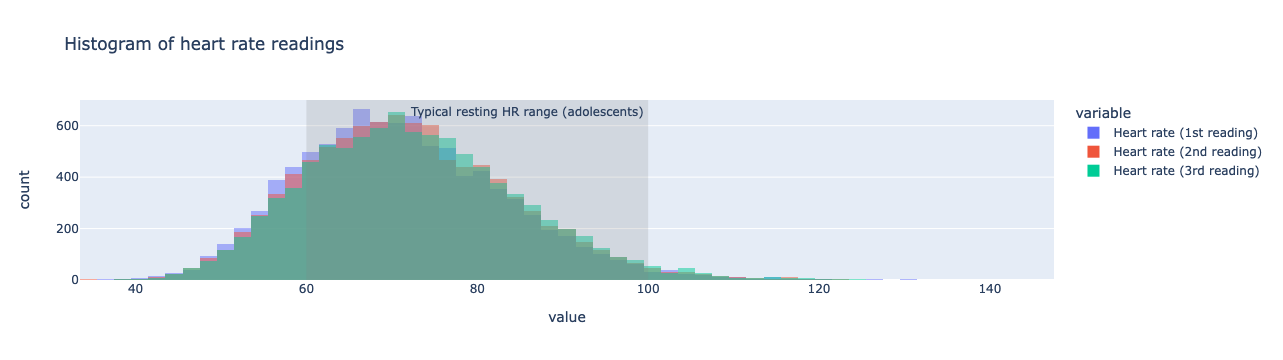

In [56]:
# Heart rate data
fig = px.histogram(nhanesDataBp,
                   x=['Heart rate (1st reading)', 'Heart rate (2nd reading)', 'Heart rate (3rd reading)'],
                   title='Histogram of heart rate readings',
                   barmode='overlay',
                   nbins=100,
                   # marginal='box' # Can be turned on to explore box plots as well (should comment out vrect below if turned on)
                   )
fig.add_vrect(x0=60, x1=100,
              annotation_text="Typical resting HR range (adolescents)", 
              annotation_position="top right",
              fillcolor="grey", 
              opacity=0.2, 
              line_width=0)

fig.show()

# Interpret

As we can see in the plots above, there's a generally "normal" distribution to the blood pressure and heart rate data. The vast majority of subjects tend to have measurements that cluster around the mean, with counts dropping off quickly as you get farther away from the center in either direction. There are significant outliers in both directions, but that's an inevitability in any biological dataset.

However, height doesn't follow the same pattern. Why might that be?

#### Height
- How do your measured values compare to the data? Why would there be any difference? 
- Why is neither the male or female average height located at the highest point of the histogram?

#### Blood Pressure
- Is there a noticeable difference between subsequent measurements of blood pressure (you can turn them on and off by clicking on the legend)? 
- Why might that exist (or not exist)?
- Given the shape of the histogram, would you say most participants in this dataset have a healthy blood pressure? How many do not?

#### Heart Rate
- How does your measured heart rate compare to the data? Can you think of any reason why they might not fall in the center of the plot?
- Perform a quick exercise for 30 seconds or so, like jumping jacks or pushups. How does that change your heart rate? Is it still in the normal range?
- Why would subsequent measurements of hear rate differ? You can investigate this by showing and hiding the different variables by clicking on the legend

# Communicate
Below are some writing prompts to help you reflect on the new information that is presented from the data. When we look at the evidence, think about what you perceive about the information. Is this perception based on what the evidence shows? If others were to view it, what perceptions might they have?

- I used to think __but now I know__.
- I wish I knew more about __.
- This visualization reminds me of __.
- I really like __.


[![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)